#**Google Stock Price Prediction**

In [ ]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing dataset
train = pd.read_csv('/content/drive/MyDrive/trainset.csv')
test = pd.read_csv('/content/drive/MyDrive/testset.csv')

In [ ]:
df = pd.DataFrame(train)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [ ]:
#Data Information
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,652.704082,657.475653,647.433700,652.657015,652.657015,2.414928e+06
std,175.630574,176.627416,174.732814,175.820993,175.820993,1.672160e+06
min,350.053253,350.391052,345.512787,349.164032,349.164032,7.900000e+03
25%,528.287079,532.615204,524.232483,528.429413,528.429413,1.336900e+06
50%,600.002563,603.236511,594.453674,598.005554,598.005554,1.842300e+06
75%,774.015015,779.120025,768.662506,772.720001,772.720001,3.090850e+06
max,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,2.328310e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
#Dropping NaN values
df.dropna(inplace=True)

In [ ]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)

Date 	-	 0.0
Open 	-	 0.0
High 	-	 0.0
Low 	-	 0.0
Close 	-	 0.0
Adj Close 	-	 0.0
Volume 	-	 0.0


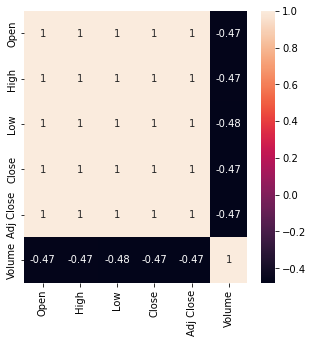

In [ ]:
cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

Looks like all colums except volume are highly co-related. Use them for predictions.

In [ ]:
df.drop(["Date","Adj Close", "Volume"], axis = 1, inplace = True)
df.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# def detect_outliers_zscore(data):
#     outliers = []
#     data = sorted(list(data))
#     q1 = np.percentile(data, 25)
#     q3 = np.percentile(data, 75)
#     # print(q1, q3)
#     IQR = q3-q1
#     lwr_bound = q1-(1.5*IQR)
#     upr_bound = q3+(1.5*IQR)
#     # print(lwr_bound, upr_bound)
#     for i in data: 
#         if (i<lwr_bound or i>upr_bound):
#             outliers.append(i)
#     for i in outliers:
#         return np.delete(data, np.where(data==i))
# for i in df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]:
#     df[i]=detect_outliers_zscore(np.array(df[i]))



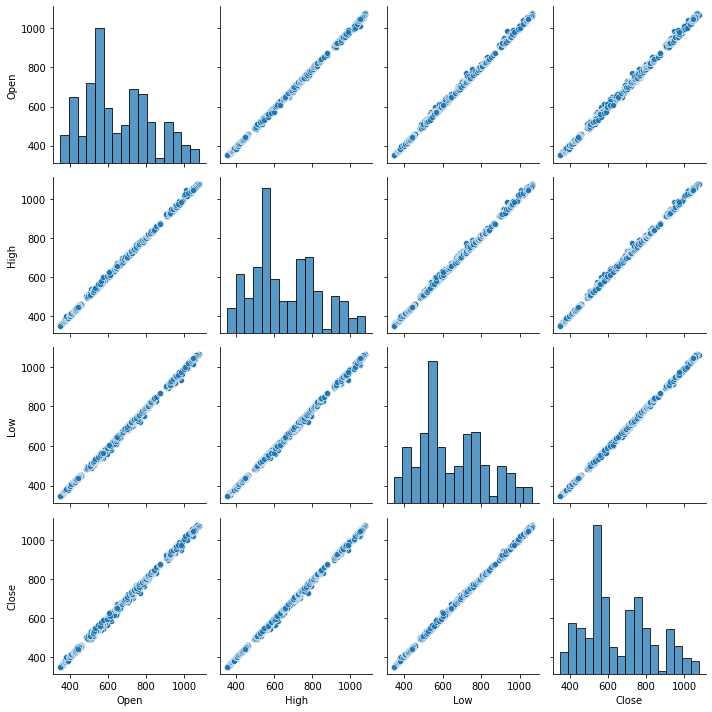

In [ ]:
sns.pairplot(df)
plt.tight_layout()

Since other parameters have linear relationship with close, we are using some linear models fore prediction

In [ ]:
#Since other parameters have linear relationship with close, we are using some linear models fore prediction
X = df.drop(['Close'], axis=1)
y = df['Close']

In [ ]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

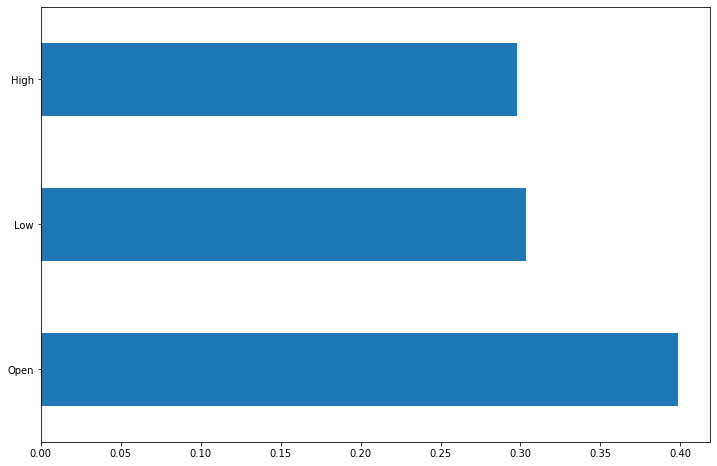

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
#Since range of data in different columns veries significantly we need to scale the independent variable i.e. X. For this we will use Min-Max Scaling.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Open,High,Low
0,0.010111,0.014778,0.014549
1,0.013886,0.018142,0.017434
2,0.016907,0.024651,0.022250
3,0.021093,0.023225,0.024256
4,0.021155,0.021123,0.020001


In [ ]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc=[]


In [ ]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
1007,771.820007,773.304493
1008,786.140015,785.137322
1009,786.900024,786.938764
1010,794.020020,792.139635
1011,806.150024,802.939904


In [ ]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9981389354895909


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))

MAE: 2.4530245416650667
MSE: 11.17832248765219
RMSE: 3.3433998396321356


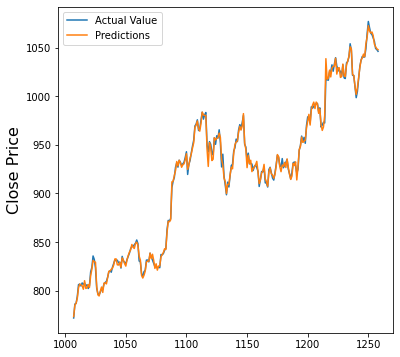

In [ ]:
plt.figure(figsize=(6,6))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()